## Part 1. Molecules are manually defined using SMILES strings to avoid dependency on external databases.

In [24]:
from rdkit import Chem
from rdkit.Chem import Draw

### 1. SMILES and Molecule Objects

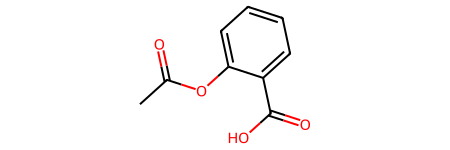

In [62]:
smiles = "CC(=O)OC1=CC=CC=C1C(=O)O"  # aspirin
mol = Chem.MolFromSmiles(smiles)
mol

In [26]:
# ethanol,ethane,ethylamine,propane,benzene,acetic acid,ethyl methyl ether,isopropanol,isobutane,methylamine
smiles_list = [ "CCO", "CC", "CCN","CCC", "c1ccccc1", "CC(=O)O", "CCOC","CC(C)O","CC(C)C", "CN" ]         

### 2. Molecule Visualization

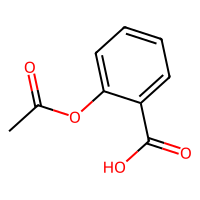

In [63]:
Draw.MolToImage(mol, size=(200, 200))

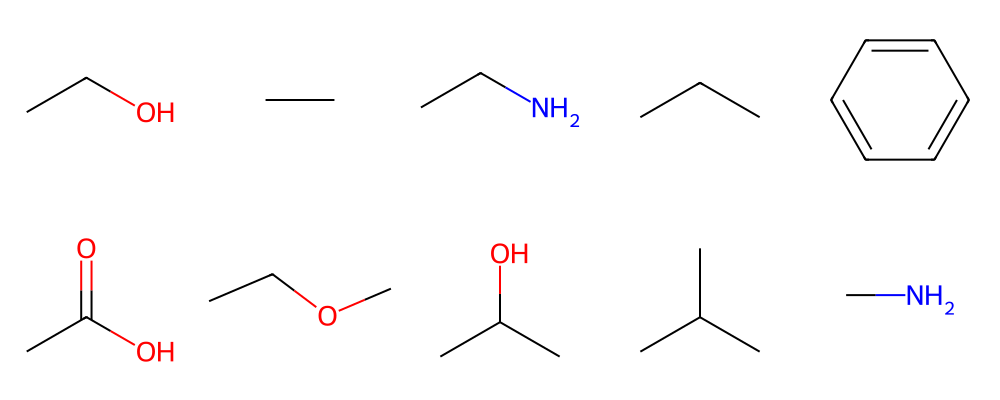

In [28]:
molecules = [Chem.MolFromSmiles(s) for s in smiles_list]
Draw.MolsToGridImage(molecules, molsPerRow=5, subImgSize=(200, 200))

### 3. Basic Molecular Descriptors

In [29]:
from rdkit.Chem import Descriptors
import pandas as pd

In [30]:

descriptors = {
    "Molecular Weight": Descriptors.MolWt(mol),
    "LogP": Descriptors.MolLogP(mol),
    "H Donors": Descriptors.NumHDonors(mol),
    "H Acceptors": Descriptors.NumHAcceptors(mol),
    "Rotatable Bonds": Descriptors.NumRotatableBonds(mol),}

descriptors

{'Molecular Weight': 46.069,
 'LogP': -0.0014000000000000123,
 'H Donors': 1,
 'H Acceptors': 1,
 'Rotatable Bonds': 0}

In [31]:
data = []

for s in smiles_list:
    mol = Chem.MolFromSmiles(s)
    data.append({
        "SMILES": s,
        "MolWt": Descriptors.MolWt(mol),
        "LogP": Descriptors.MolLogP(mol),
        "HBD": Descriptors.NumHDonors(mol),
        "HBA": Descriptors.NumHAcceptors(mol)
    })

df = pd.DataFrame(data)
df

,SMILES,MolWt,LogP,HBD,HBA
0,CCO,46.069,-0.0014,1,1
1,CC,30.070,1.0262,0,0
2,CCN,45.085,-0.0350,1,1
3,CCC,44.097,1.4163,0,0
4,c1ccccc1,78.114,1.6866,0,0
5,CC(=O)O,60.052,0.0909,1,1
6,CCOC,60.096,0.6527,0,1
7,CC(C)O,60.096,0.3871,1,1
8,CC(C)C,58.124,1.6623,0,0
9,CN,31.058,-0.4251,1,1


### 4. Working with Multiple Molecules

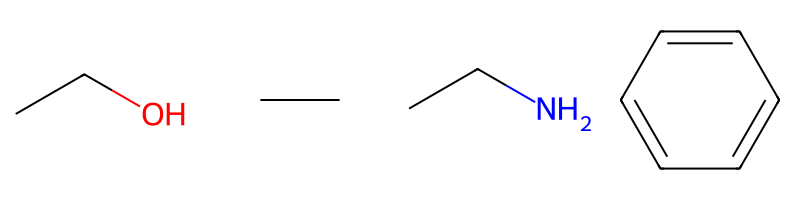

In [32]:
smiles_list = ["CCO", "CC", "CCN", "c1ccccc1"]

molecules = [Chem.MolFromSmiles(s) for s in smiles_list]
Draw.MolsToGridImage(molecules, molsPerRow=4)

## Part 2. External Data Sources for Morphine

#### SMILES strings were collected manually from PubChem and ChEMBLto demonstrate real-world chemoinformatics workflows without API dependencies.

In [33]:
#!{sys.executable} -m pip install requests

In [39]:
import requests

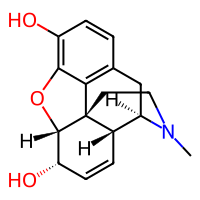

In [37]:
morphine_url = "https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/5288826/SDF"
morphine_mol = requests.get(morphine_url).text

morphine = Chem.MolFromMolBlock(morphine_mol)
Draw.MolToImage(morphine, size=(200, 200))

In [45]:
morphine.GetNumAtoms()

21

In [47]:
[atom.GetSymbol() for atom in morphine.GetAtoms() if not atom.IsInRing()]

['O', 'O', 'C']

In [48]:
[atom.GetSymbol() for atom in morphine.GetAtoms()]

['O',
 'O',
 'O',
 'N',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C']

In [50]:
from rdkit.Chem import AllChem

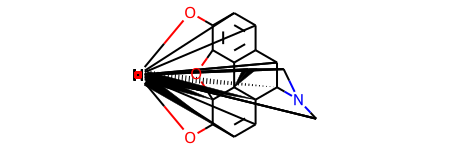

In [51]:
morphine_with_H = Chem.AddHs(morphine)
morphine_with_H

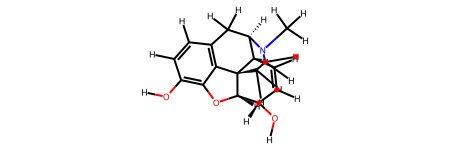

In [52]:
AllChem.Compute2DCoords(morphine_with_H)
morphine_with_H

In [53]:
Descriptors.MolWt(morphine)

285.34299999999996

In [55]:
Descriptors.MolLogP(morphine)

1.1980999999999997

In [56]:
Descriptors.NumRotatableBonds(morphine)

0

In [57]:
descriptors_morphine = {
    "Molecular Weight": Descriptors.MolWt(morphine),
    "LogP": Descriptors.MolLogP(morphine),
    "H Donors": Descriptors.NumHDonors(morphine),
    "H Acceptors": Descriptors.NumHAcceptors(morphine),
    "Rotatable Bonds": Descriptors.NumRotatableBonds(morphine),}

descriptors_morphine

{'Molecular Weight': 285.34299999999996,
 'LogP': 1.1980999999999997,
 'H Donors': 2,
 'H Acceptors': 4,
 'Rotatable Bonds': 0}

In [60]:
data = [{
    "Name": "Morphine",
   # "SMILES": Chem.MolToSmiles(morphine),
    "MolWt": Descriptors.MolWt(morphine),
    "LogP": Descriptors.MolLogP(morphine),
    "HBD": Descriptors.NumHDonors(morphine),
    "HBA": Descriptors.NumHAcceptors(morphine)
}]

df = pd.DataFrame(data)
df

,Name,MolWt,LogP,HBD,HBA
0,Morphine,285.343,1.1981,2,4


##### Although a single compound (morphine) is analyzed here, the workflow is implemented in a list-based manner to allow easy extension to multiple molecules without refactoring the code.

In [61]:
smiles_list = ["CN1CCC23C4=CC=CC=C4O[C@H]2[C@H](O)C=C[C@H]3O1"]

data = []

for s in smiles_list:
    mol = Chem.MolFromSmiles(s)
    data.append({
        "Name": "Morphine",
        #"SMILES": s,
        "MolWt": Descriptors.MolWt(mol),
        "LogP": Descriptors.MolLogP(mol),
        "HBD": Descriptors.NumHDonors(mol),
        "HBA": Descriptors.NumHAcceptors(mol)
    })

df = pd.DataFrame(data)
df

,Name,MolWt,LogP,HBD,HBA
0,Morphine,259.305,1.2518,1,4
